# Project: Soccer and Good Ole' Numbers

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report is an analysis of Soccer data provided by Hugo Mathien on Kaggle. The European Soccer Database that Hugo provided will be analyzed and will focus on player's attributes and contributing factors to their subsequent successes or failures. It is important to note that these initial findings are tentative and are subject to change through the duration of this report/project.

Over the course of this report I will be exploring answers to the following questions:

> **1.)**Based upon the players' collective weights, what is the overall rating? 
> **2.)**Based upon the players' collective height, what is the overall rating? 

In [3]:
#import all necessary packages and functions.
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from weight_visualizations import usage_plot as w_userplot
sns.set(style="ticks", color_codes=True)
from IPython.display import display
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### Step one

The code below first pulls all of the data from the Kaggle Soccer Database Data provided at the following link:
https://www.kaggle.com/hugomathien/soccer

It will then look a combination of the two tables that will be used throughout the remainder of this report.

#### General Properties

In [4]:
#This code imports the database via SQLlite
import sqlite3
conn = sqlite3.connect(r"database.sqlite")

#This code reads the two tables which I will join and alter/reduce below to create data frame
pd.read_sql_query("select * from Player", conn)

pd.read_sql_query("select * from Player_Attributes;", conn)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


### Data Cleaning

The cell below contains a combination of tables "Player" and "Player_Attributes" that have been joined on the player as a primary key.  Due to the join and column limitations in SQL there would be no returned data structures that would need fixed.

In [5]:
#The below query was for research on my first join to ensure syntax accuracy and validity
#pd.read_sql_query("select Player.id, Player.player_name, Player.birthday, Player.height, Player.weight, Player_Attributes.overall_rating, Player_Attributes.potential, Player_Attributes.vision, Player_Attributes.penalties, Player_Attributes.standing_tackle from Player inner join Player_Attributes on Player.id = Player_Attributes.id where Player.id is not null;", conn)

#This query defines my first data frame of distinct weights and corresponding overall_ratings
df1 = pd.read_sql_query("select distinct Player.weight, Player_Attributes.overall_rating from Player inner join Player_Attributes on Player.id = Player_Attributes.id where Player.id is not null order by Player_Attributes.overall_rating;", conn)
#This query defines my second data frame of distinct heights and corresponding overall_ratings
df2 = pd.read_sql_query("select distinct Player.height, Player_Attributes.overall_rating from Player inner join Player_Attributes on Player.id = Player_Attributes.id where Player.id is not null order by Player_Attributes.overall_rating;", conn)

<a id='eda'></a>
## Exploratory Data Analysis

Below are two types of outputs for each question.  The first is a pivot table of mean and median based upon the overall rating.  The second is a plot visualization  of the same.

### Based upon the players' collective weights, what is the overall rating?

In [18]:
#This data gives a numbers view pivot table by overall_position based upon weight while pulling the mean and median ranges
df1_1 = pd.pivot_table(df1, index= 'overall_rating', values= "weight",               aggfunc= [np.mean, np.median])
pd.pivot_table(df1, index= 'overall_rating', values= "weight",               aggfunc= [np.mean, np.median])

,mean,median
,weight,weight
overall_rating,,
40.0,168.750000,167.5
42.0,168.000000,168.0
44.0,161.500000,166.5
45.0,183.222222,187.0
46.0,167.636364,165.0
47.0,165.000000,165.0
48.0,170.181818,168.0
49.0,171.333333,170.0


Text(0,0.5,'Weight in lbs')

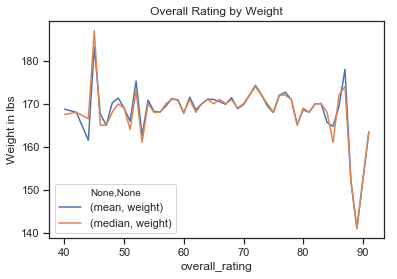

In [17]:
#This is the data that is pulled to view the overall weight of by percentage using pandas' plot function
df1_1.plot()
plt.title('Overall Rating by Weight')
plt.ylabel('Weight in lbs')

By the above statistical analysis we could possibly infer that there isn't a dramatic difference in overall rating as it corresponds to weight. There does however seem to be a slight trend toward more distinct variations between the rating of higher player as well as lower players and the dramatic weight fluctuations.

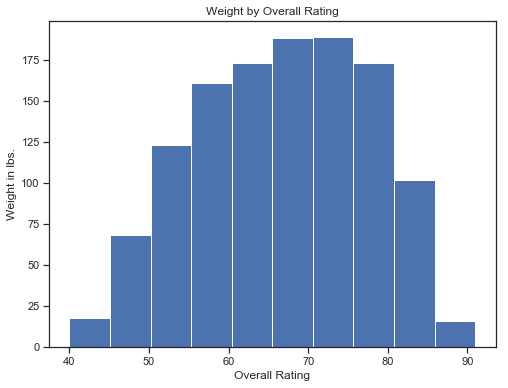

In [19]:
#Uses an imported weight module to create other visualization, specifically a histogram
w_userplot(df1, 'overall_rating')

The above histogram infers that the data is very close to a standard distribution. 

### Based upon the players' collective heights, what is the overall rating?

In [7]:
#This data gives a numbers view pivot table by overall_position based upon height while pulling the mean and median ranges
df1_2 = pd.pivot_table(df2, index= 'overall_rating', values= "height",               aggfunc= [np.mean, np.median])
pd.pivot_table(df2, index= 'overall_rating', values= "height",               aggfunc= [np.mean, np.median])

,mean,median
,height,height
overall_rating,,
40.0,180.340000,180.34
42.0,177.800000,177.80
44.0,181.610000,181.61
45.0,187.452000,187.96
46.0,179.832000,179.07
47.0,180.340000,180.34
48.0,185.057143,185.42
49.0,181.186667,180.34


Text(0,0.5,'Height in inches')

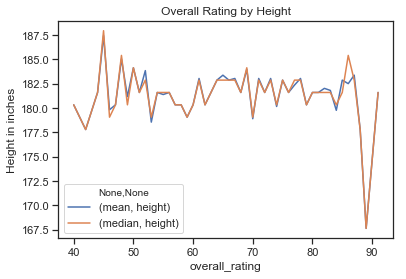

In [14]:
#This is the data that is pulled to view the overall height of by percentage using pandas' plot function
df1_2.plot()
plt.title('Overall Rating by Height')
plt.ylabel('Height in inches')

Text(0.5,1,'Overall Rating by Height')

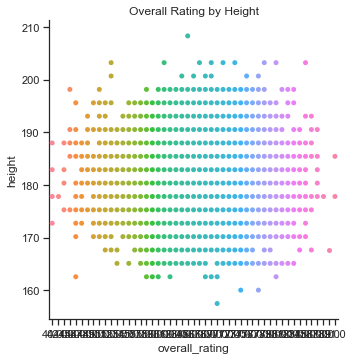

In [28]:
#Using a catagory plot to look at height as well
sns.catplot(x='overall_rating', y="height", kind="swarm", data=df2);
plt.title('Overall Rating by Height')

Text(0.5,1,'Overall Rating by Height')

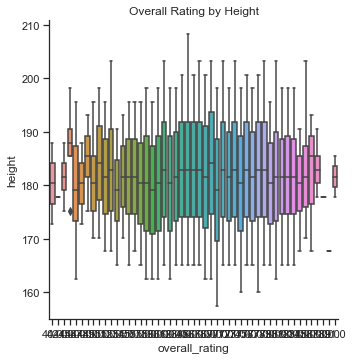

In [30]:
#Using a catagory plot to look at height from one more angle
sns.catplot(x='overall_rating', y="height", kind="box", data=df2);
plt.title('Overall Rating by Height')

By the three above statistical analysis we could possibly infer that there is much more fluctuation in overall rating as it corresponds to height. There also appears to be a wide disparity of outliers in the data. Based upon the above plot we could also consider that this very well may be a standard distribution of data.

<a id='conclusions'></a>
## Conclusions

Over all I found that there isn't a significant different with regard to overall rating and the corresponding mean/median heights and weights. Both sets of data seemed to indicate a standard distribution(bell-curve) of data, based upon looking at the outliers alone. It is my personal opinion that more study could be done to see if height or weight correlates to specific rankings, which may be a better assessment of the data. More to come!

Limitation Notes: Due to a variety of outliers in the height data, the data may be slightly skewed even though it appears to be close to a standard distribution. The weight seems to be closer to a bell curve over the height data. Overall the data itself seems to be very accurate, considering the lack of null data as well as the given median and means. 